<a href="https://colab.research.google.com/github/Mariam-mostafa3/purchased_prediction_using_logistic_regression/blob/main/purchased_prediction_using_logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

In [7]:
#read the data
data=pd.read_csv('/content/User_Data.csv')

In [8]:
#explore data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [9]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


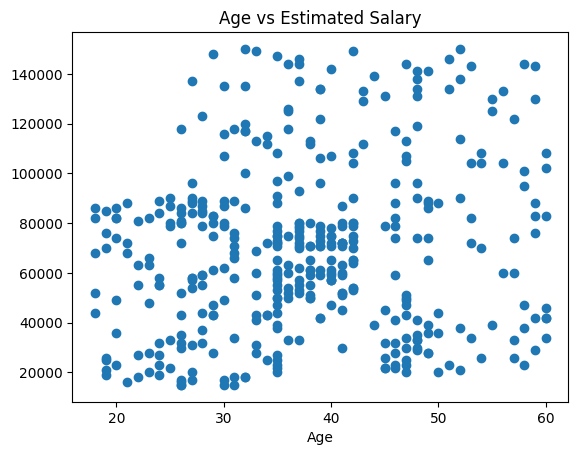

In [10]:
#data visualization
plt.scatter(data['Age'],data['EstimatedSalary'])
plt.title('Age vs Estimated Salary')
plt.xlabel('Age')
plt.show()

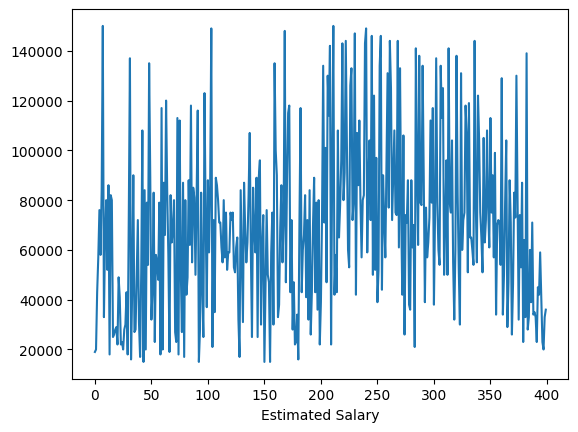

In [11]:
plt.plot(data['EstimatedSalary'])
plt.xlabel('Estimated Salary')
plt.show()

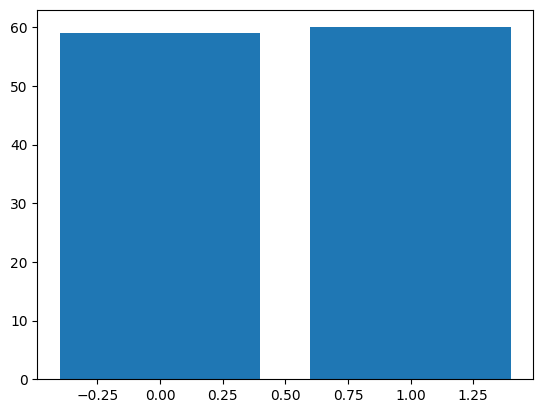

In [12]:
plt.bar(data['Purchased'],data['Age'])
plt.show()

<Axes: ylabel='count'>

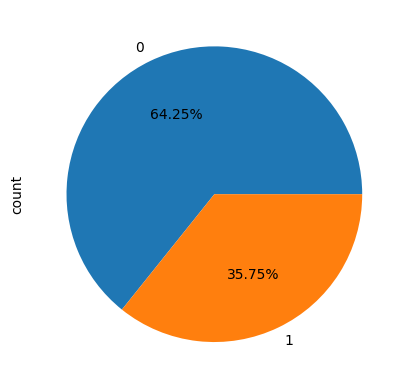

In [13]:
data['Purchased'].value_counts().plot(kind='pie',autopct='%0.2f%%')

In [14]:
#data preprossissing
#drop unnecessary columns
data.drop(['User ID'],axis=1,inplace=True)

In [15]:
data.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [16]:
#unique values of gender

data['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [17]:
data['Gender'].replace('Male',1,inplace=True)
data['Gender'].replace('Female',0,inplace=True)


In [18]:
data['Gender'].unique()

array([1, 0])

In [19]:
data.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


In [20]:
#features
features=data.drop(['Purchased'],axis=1)
#label
label=data['Purchased']

In [21]:
features.head()

,Gender,Age,EstimatedSalary
0,1,19,19000
1,1,35,20000
2,0,26,43000
3,0,27,57000
4,1,19,76000


In [22]:
label=pd.DataFrame(label)
label.head()

,Purchased
0,0
1,0
2,0
3,0
4,0


In [23]:
# split features
features_train,features_test,label_train,label_test=train_test_split(data.drop(['Purchased'],axis=1),data['Purchased'],test_size=0.25,random_state=1)


In [24]:
#scalling the data
scalar=MinMaxScaler()
features_train=scalar.fit_transform(features_train)
features_test=scalar.transform(features_test)

In [25]:
#MODEL
model=LogisticRegression()
model.fit(features_train,label_train)

LogisticRegression()

In [26]:
prediction=model.predict(features_test)
prediction=pd.DataFrame(prediction)

In [27]:
prediction.rename(columns={0:'Prediction'},inplace=True)



In [28]:
prediction.head()

,Prediction
0,0
1,0
2,1
3,1
4,0


In [29]:
label_test=pd.DataFrame(label_test)
label_test.head()

,Purchased
398,0
125,0
328,1
339,1
172,0


In [30]:
label_test.reset_index(drop=True,inplace=True)

In [31]:
new_data=pd.concat([label_test,prediction],axis=1,join='inner')
new_data.head()

,Purchased,Prediction
0,0,0
1,0,0
2,1,1
3,1,1
4,0,0


In [32]:
#evaluation the model
print(accuracy_score(label_test,prediction))

0.8
